# 0.0 Imports

In [1]:
# Bibliotecas utilizadas
import pandas as  pd
import numpy as   np
import seaborn as sns
import inflection
from matplotlib           import pyplot as plt
from IPython.core.display import HTML

## 0.1 Helper Functions

In [2]:
# Configuração padrão do Jupyter inicial
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [4]:
# Carregando dados do perfil do eleitorado
df_profiles_raw = pd.read_csv('../data/eleitorado/perfil_eleitorado_2020/perfil_eleitorado_2020.csv', encoding='ISO-8859-1', sep = ';')

# Carregando dados do perfil dos resultados do 1 turno
df_results_raw = pd.read_csv('../data/resultados/SP_turno_1.csv', encoding='ISO-8859-1', sep = ';')

In [5]:
# Visualização das 5 primeiras linhas do dataset
df_profiles_raw.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,FEMININO,3,CASADO,7074,70 a 74 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,47,37,1,0
1,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,FEMININO,3,CASADO,7074,70 a 74 anos,4,ENSINO FUNDAMENTAL COMPLETO,5,4,0,0
2,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,FEMININO,3,CASADO,7074,70 a 74 anos,5,ENSINO MÉDIO INCOMPLETO,1,1,0,0
3,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,FEMININO,3,CASADO,7074,70 a 74 anos,6,ENSINO MÉDIO COMPLETO,10,8,0,0
4,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,FEMININO,3,CASADO,7074,70 a 74 anos,8,SUPERIOR COMPLETO,23,18,0,0


In [6]:
# Visualização das 5 primeiras linhas do dataset
df_results_raw.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,-1,#NULO#,#NULO#,15/11/2020 22:26:42,386,241,145,1,APURADA,2,Branco,95,Branco,5,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
1,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,13,PT,Partido dos Trabalhadores,15/11/2020 22:26:42,386,241,145,1,APURADA,1,Nominal,13,JILMAR TATTO,4,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
2,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,18,REDE,Rede Sustentabilidade,15/11/2020 22:26:42,386,241,145,1,APURADA,1,Nominal,18,MARINA HELOU,1,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
3,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,40,PSB,Partido Socialista Brasileiro,15/11/2020 22:26:42,386,241,145,1,APURADA,1,Nominal,40,MÁRCIO FRANÇA,29,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
4,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,SP,71072,SÃO PAULO,1,1,1015,11,Prefeito,45,PSDB,Partido da Social Democracia Brasileira,15/11/2020 22:26:42,386,241,145,1,APURADA,1,Nominal,45,BRUNO COVAS,111,1618073,432.454.548.163.181.015.,306.728,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1


# 1.0 Data Description

In [7]:
# Cópias para otimização
df_profiles = df_profiles_raw.copy()
df_results = df_results_raw.copy()

## 1.1 Rename Columns

In [8]:
# Profiles Database - Mudar para snake case
old_cols = ['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'CD_MUN_SIT_BIOMETRIA', 'DS_MUN_SIT_BIOMETRIA',
       'NR_ZONA', 'CD_GENERO', 'DS_GENERO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA', 'DS_FAIXA_ETARIA',
       'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL',
       'QT_ELEITORES_BIOMETRIA', 'QT_ELEITORES_DEFICIENCIA',
       'QT_ELEITORES_INC_NM_SOCIAL']

snake_case = lambda x: inflection.underscore(x)

new_cols = list( map(snake_case, old_cols))
df_profiles.columns = new_cols

In [9]:
# Results Database - Mudar para snake case
old_cols = ['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_PLEITO', 'DT_PLEITO', 'NR_TURNO', 'CD_ELEICAO',
       'DS_ELEICAO', 'SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA',
       'NR_SECAO', 'NR_LOCAL_VOTACAO', 'CD_CARGO_PERGUNTA',
       'DS_CARGO_PERGUNTA', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DT_BU_RECEBIDO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES',
       'CD_TIPO_URNA', 'DS_TIPO_URNA', 'CD_TIPO_VOTAVEL', 'DS_TIPO_VOTAVEL',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_URNA_EFETIVADA',
       'CD_CARGA_1_URNA_EFETIVADA', 'CD_CARGA_2_URNA_EFETIVADA',
       'CD_FLASHCARD_URNA_EFETIVADA', 'DT_CARGA_URNA_EFETIVADA',
       'DS_CARGO_PERGUNTA_SECAO', 'DS_AGREGADAS', 'DT_ABERTURA',
       'DT_ENCERRAMENTO', 'QT_ELEITORES_BIOMETRIA_NH', 'DT_EMISSAO_BU',
       'NR_JUNTA_APURADORA', 'NR_TURMA_APURADORA']

snake_case = lambda x: inflection.underscore(x)

new_cols = list( map(snake_case, old_cols))
df_results.columns = new_cols

## 1.2 Data Dimensions

In [10]:
# Profiles Database
print("Número de linhas: {}".format(df_profiles.shape[0]))
print("Número de colunas: {}".format(df_profiles.shape[1]))

Número de linhas: 4248507
Número de colunas: 21


In [11]:
# Results Database
print("Número de linhas: {}".format(df_results.shape[0]))
print("Número de colunas: {}".format(df_results.shape[1]))

Número de linhas: 9434000
Número de colunas: 45


## 1.3 Data Types

### 1.3.1 Profiles Dataset Dtypes

In [12]:
# Tipologia dos dados do perfil do eleitorado
df_profiles.dtypes

dt_geracao                    object
hh_geracao                    object
ano_eleicao                    int64
sg_uf                         object
cd_municipio                   int64
nm_municipio                  object
cd_mun_sit_biometria           int64
ds_mun_sit_biometria          object
nr_zona                        int64
cd_genero                      int64
ds_genero                     object
cd_estado_civil                int64
ds_estado_civil               object
cd_faixa_etaria                int64
ds_faixa_etaria               object
cd_grau_escolaridade           int64
ds_grau_escolaridade          object
qt_eleitores_perfil            int64
qt_eleitores_biometria         int64
qt_eleitores_deficiencia       int64
qt_eleitores_inc_nm_social     int64
dtype: object

### 1.3.2 Results Dataset Dtypes

In [13]:
# Tipologia dos dados do perfil do eleitorado
df_results.dtypes

dt_geracao                      object
hh_geracao                      object
ano_eleicao                      int64
cd_tipo_eleicao                  int64
nm_tipo_eleicao                 object
cd_pleito                        int64
dt_pleito                       object
nr_turno                         int64
cd_eleicao                       int64
ds_eleicao                      object
sg_uf                           object
cd_municipio                     int64
nm_municipio                    object
nr_zona                          int64
nr_secao                         int64
nr_local_votacao                 int64
cd_cargo_pergunta                int64
ds_cargo_pergunta               object
nr_partido                       int64
sg_partido                      object
nm_partido                      object
dt_bu_recebido                  object
qt_aptos                         int64
qt_comparecimento                int64
qt_abstencoes                    int64
cd_tipo_urna             

## 1.4 Drop Columns

- Removendo colunas desnecessárias para a análise.

### 1.4.1 Profiles Dataset

Análise dos dados do perfil do eleitorado:

- Colunas com categorias únicas são fortes candidatas para a exclusão.
- Colunas que informam códigos também serão fortes candidatas.
- Datas devem ser avaliadas primeiramente.

In [14]:
# Análise da quantidade de categorias em cada coluna do dataset
for x in df_profiles.columns:
    print(f'{x}:{df_profiles[x].unique().shape[0]}')

dt_geracao:1
hh_geracao:1
ano_eleicao:1
sg_uf:26
cd_municipio:5569
nm_municipio:5296
cd_mun_sit_biometria:1
ds_mun_sit_biometria:1
nr_zona:421
cd_genero:3
ds_genero:3
cd_estado_civil:6
ds_estado_civil:6
cd_faixa_etaria:23
ds_faixa_etaria:23
cd_grau_escolaridade:9
ds_grau_escolaridade:9
qt_eleitores_perfil:2953
qt_eleitores_biometria:2658
qt_eleitores_deficiencia:173
qt_eleitores_inc_nm_social:8


In [15]:
# Excluindo as colunas selecionadas
df_profiles.drop(columns=['dt_geracao', 'nr_zona', 'hh_geracao', 'ano_eleicao', 'cd_municipio', 'cd_mun_sit_biometria', 'ds_mun_sit_biometria', 'cd_genero', 
                          'cd_estado_civil', 'cd_faixa_etaria', 'cd_grau_escolaridade'], inplace=True)

In [16]:
df_profiles.head()

,sg_uf,nm_municipio,ds_genero,ds_estado_civil,ds_faixa_etaria,ds_grau_escolaridade,qt_eleitores_perfil,qt_eleitores_biometria,qt_eleitores_deficiencia,qt_eleitores_inc_nm_social
0,SP,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,ENSINO FUNDAMENTAL INCOMPLETO,47,37,1,0
1,SP,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,ENSINO FUNDAMENTAL COMPLETO,5,4,0,0
2,SP,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,ENSINO MÉDIO INCOMPLETO,1,1,0,0
3,SP,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,ENSINO MÉDIO COMPLETO,10,8,0,0
4,SP,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,SUPERIOR COMPLETO,23,18,0,0


### 1.4.2 Results Dataset

Análise dos dados dos resultados:

- Colunas com categorias únicas são fortes candidatas para a exclusão.
- Colunas que informam códigos também serão fortes candidatas.
- Datas devem ser avaliadas primeiramente.
- Colunas 'nm_partido' e 'nr_partido' representam a mesma coisa que 'sg_partido'.
- 'dt_bu_recebido', 'dt_emissao_bu', 'dt_carga_urna_efetivada', 'ds_cargo_pergunta_secao', 'nr_junta_apuradora', 'nr_turma_apuradora', 'dt_abertura', 'dt_encerramento' e 'ds_agregadas' são irrelevantes para a análise.

In [17]:
# Análise da quantidade de categorias em cada coluna do dataset
for x in df_results.columns:
    print(f'{x}:{df_results[x].unique().shape[0]}')

dt_geracao:1
hh_geracao:1
ano_eleicao:1
cd_tipo_eleicao:1
nm_tipo_eleicao:1
cd_pleito:1
dt_pleito:1
nr_turno:1
cd_eleicao:1
ds_eleicao:1
sg_uf:1
cd_municipio:645
nm_municipio:645
nr_zona:393
nr_secao:1017
nr_local_votacao:166
cd_cargo_pergunta:2
ds_cargo_pergunta:2
nr_partido:34
sg_partido:34
nm_partido:34
dt_bu_recebido:13799
qt_aptos:461
qt_comparecimento:399
qt_abstencoes:250
cd_tipo_urna:1
ds_tipo_urna:1
cd_tipo_votavel:4
ds_tipo_votavel:4
nr_votavel:11171
nm_votavel:76621
qt_votos:322
nr_urna_efetivada:85714
cd_carga_1_urna_efetivada:85714
cd_carga_2_urna_efetivada:82254
cd_flashcard_urna_efetivada:5051
dt_carga_urna_efetivada:9889
ds_cargo_pergunta_secao:2034
ds_agregadas:661
dt_abertura:1517
dt_encerramento:1458
qt_eleitores_biometria_nh:1
dt_emissao_bu:1699
nr_junta_apuradora:2
nr_turma_apuradora:2


In [18]:
# Excluindo as colunas selecionadas
df_results.drop(columns=['dt_geracao', 'hh_geracao', 'ano_eleicao', 'cd_tipo_eleicao', 'nm_partido', 'dt_bu_recebido', 
                         'dt_carga_urna_efetivada', 'nm_tipo_eleicao', 'cd_pleito', 'dt_pleito', 'nr_turno', 
                         'cd_eleicao', 'ds_eleicao', 'nr_zona', 'sg_uf', 'cd_municipio', 'cd_cargo_pergunta', 'nr_partido', 
                         'cd_tipo_urna', 'ds_tipo_urna', 'cd_tipo_votavel', 'cd_carga_1_urna_efetivada', 'cd_carga_2_urna_efetivada', 
                         'ds_cargo_pergunta_secao', 'cd_flashcard_urna_efetivada', 'dt_emissao_bu', 'nr_junta_apuradora', 
                         'nr_turma_apuradora', 'qt_eleitores_biometria_nh', 'dt_abertura', 'dt_encerramento', 'ds_agregadas'], inplace=True)

In [19]:
df_results.head()

,nm_municipio,nr_secao,nr_local_votacao,ds_cargo_pergunta,sg_partido,qt_aptos,qt_comparecimento,qt_abstencoes,ds_tipo_votavel,nr_votavel,nm_votavel,qt_votos,nr_urna_efetivada
0,SÃO PAULO,1,1015,Prefeito,#NULO#,386,241,145,Branco,95,Branco,5,1618073
1,SÃO PAULO,1,1015,Prefeito,PT,386,241,145,Nominal,13,JILMAR TATTO,4,1618073
2,SÃO PAULO,1,1015,Prefeito,REDE,386,241,145,Nominal,18,MARINA HELOU,1,1618073
3,SÃO PAULO,1,1015,Prefeito,PSB,386,241,145,Nominal,40,MÁRCIO FRANÇA,29,1618073
4,SÃO PAULO,1,1015,Prefeito,PSDB,386,241,145,Nominal,45,BRUNO COVAS,111,1618073


## 1.5 Check NA

### 1.5.1 Profiles Dataset

In [20]:
# Checagem de valores NA's sobre os dados do perfil do eleitorado
df_profiles.isna().sum()

sg_uf                         0
nm_municipio                  0
ds_genero                     0
ds_estado_civil               0
ds_faixa_etaria               0
ds_grau_escolaridade          0
qt_eleitores_perfil           0
qt_eleitores_biometria        0
qt_eleitores_deficiencia      0
qt_eleitores_inc_nm_social    0
dtype: int64

Consoante o PDF 'leiame.pdf' enviado, é possível existir campos preenchidos com:
- '#NULO'
- '#NE'
- '#NULO#'

In [21]:
# Checagem de possíveis nulidades adicionais segundo o PDF
contador_nulos_adicionais_ne = (df_profiles == '#NE').sum().sum()
print(f"Total de ocorrências de '#NE': {contador_nulos_adicionais_ne}")

Total de ocorrências de '#NE': 0


In [22]:
contador_nulos_adicionais_nulo1 = (df_profiles == '#NULO#').sum().sum()
print(f"Total de ocorrências de '#NULO#': {contador_nulos_adicionais_nulo1}")

Total de ocorrências de '#NULO#': 0


In [23]:
contador_nulos_adicionais_nulo2 = (df_profiles == '#NULO').sum().sum()
print(f"Total de ocorrências de '#NULO': {contador_nulos_adicionais_nulo2}")

Total de ocorrências de '#NULO': 0


### 1.5.2 Results Dataset

In [24]:
# Checagem de valores NA's sobre os dados dos resultados do 1 turno
df_results.isna().sum()

nm_municipio          0
nr_secao              0
nr_local_votacao      0
ds_cargo_pergunta     0
sg_partido            0
qt_aptos              0
qt_comparecimento     0
qt_abstencoes         0
ds_tipo_votavel       0
nr_votavel            0
nm_votavel           13
qt_votos              0
nr_urna_efetivada     0
dtype: int64

#### 1.5.2.1 Investigando valores NaN 

In [25]:
# Análise das linhas contendo NaN (13)
df_results[df_results['nm_votavel'].isna()]

,nm_municipio,nr_secao,nr_local_votacao,ds_cargo_pergunta,sg_partido,qt_aptos,qt_comparecimento,qt_abstencoes,ds_tipo_votavel,nr_votavel,nm_votavel,qt_votos,nr_urna_efetivada
2851460,TERRA ROXA,69,1015,Vereador,PODE,383,351,32,Nominal,19555,NaN,3,1806368
2851506,TERRA ROXA,70,1015,Vereador,PODE,383,342,41,Nominal,19555,NaN,2,1806010
2851594,TERRA ROXA,71,1015,Vereador,PODE,384,317,67,Nominal,19555,NaN,5,1794759
2851696,TERRA ROXA,73,1015,Vereador,PODE,384,334,50,Nominal,19555,NaN,1,1796641
2851765,TERRA ROXA,74,1015,Vereador,PODE,383,318,65,Nominal,19555,NaN,3,1796587
2851874,TERRA ROXA,79,1023,Vereador,PODE,390,362,28,Nominal,19555,NaN,1,1803375
2851937,TERRA ROXA,80,1023,Vereador,PODE,389,343,46,Nominal,19555,NaN,1,1803397
2851986,TERRA ROXA,81,1023,Vereador,PODE,390,355,35,Nominal,19555,NaN,1,1803399
2852012,TERRA ROXA,82,1023,Vereador,PODE,389,352,37,Nominal,19555,NaN,3,1796921
2852147,TERRA ROXA,84,1040,Vereador,PODE,305,258,47,Nominal,19555,NaN,2,1802699


Atenção:

- Visando uma possível substituição dos valores NaN, as 13 linhas que contém NaN na coluna 'nm_votavel' correspondem ao número 19555 na coluna 'nr_votavel', porém é preciso checar.
- Se não for o caso, a remoção das linhas nulas é válida.

In [26]:
# Checagem 
df_results['nm_votavel'][df_results['nr_votavel'] == 19555].unique()

array(['CAL', 'RONALDO GUIMARÃES', 'MARIA DO CARMO', 'ZE BOTINHA',
       'CICERA DO SANTA CRISTINA', 'NEI FERRACIOLI', 'ADRIANA GUIA',
       'GLEICA', 'JORDAN ONOFRE', 'DINHO FORÃO', 'GUINA',
       'ADEMIR DA ROCHA (PIPI)', 'ÁLISON THEODORO', 'DU TAPEÇEIRO',
       'TEREZINHA RIBEIRO', 'TUSTÃO', 'PROFESSOR ROMUALDO',
       'VALDECI DO TURVO', 'NATAN POSSIGNOLLO', 'WILSON PEREIRA',
       'MAURINHO DO PASSA VINTE', 'XANDÃO', 'SIDNEY CORRETOR',
       'ELAINE SEVERINO', 'AMAURI DA MÚSICA', 'ODAIR MOTA',
       'MÍLTON CREMASCO', 'CARLOS MARCHESINI', 'JULIA AGOSTINI',
       'RALF VILAS BOAS', 'CARLINHOS QUINELLO', 'IZILDA COSTA',
       'GILSON BULGARELLI', 'ELIANA BORGES', 'MIRIAM VIEIRA',
       'ELTON CARVALHO', 'HELINHO FISCAL DOS ONIBUS', 'LUIZINHO GOMES',
       'PAULO IEIO', 'MAIRA CONTE', 'EUCLIDES MORAES', 'ZÉ DAS PEDRAS',
       'NATAL', 'MAX DEFINE', 'REGINA BEZERRA', 'JOÃO DO SACOLÃO',
       'LIVIA SPINA', 'MARISA FERNANDES', 'EDINELSON BUENO',
       'ADRIANA FACCINA', 

Consoante o PDF 'leiame.pdf' enviado, é possível existir campos preenchidos com:
- '#NULO'
- '#NE'
- '#NULO#'

In [27]:
contador_nulos_1 = (df_results == '#NULO#').sum().sum()
print(f"Total de ocorrências de '#NULO#': {contador_nulos_1}")

Total de ocorrências de '#NULO#': 342562


In [28]:
# Diagnóstico da(s) coluna(s) que possui(em) '#NULO#'
columns_with_nulo = []
for column in df_results.columns:
    if '#NULO#' in df_results[column].values:
        columns_with_nulo.append(column)

print("Colunas com valores '#NULO#':", columns_with_nulo)

/var/folders/wt/4bhdq9gj4vnbrm086fldm7z80000gn/T/ipykernel_4084/819437429.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '#NULO#' in df_results[column].values:


Colunas com valores '#NULO#': ['sg_partido']


In [29]:
contador_nulos_2 = (df_results == '#NULO').sum().sum()
print(f"Total de ocorrências de '#NULO': {contador_nulos_2}")

Total de ocorrências de '#NULO': 0


In [30]:
contador_nulos_ne = (df_results == '#NE').sum().sum()
print(f"Total de ocorrências de '#NE': {contador_nulos_ne}")

Total de ocorrências de '#NE': 0


Existem valores '#NULO#' apenas na coluna 'sg_partido', ou seja, não há registro da sigla do partido em certas linhas do conjunto de dados. Isso pode significar que:
- Erro no registro de dados no banco.
- Não há registro da sigla do partido devido ao tipo de voto, como o voto branco.

In [31]:
# Análise e checagem se os valores '#NULO#' correspondem ao voto Branco
df_results[['sg_partido', 'ds_tipo_votavel']].loc[df_results['ds_tipo_votavel'] == 'Branco', 'ds_tipo_votavel'].unique()

array(['Branco'], dtype=object)

## 1.6 Fillout NA

Profiles Database: 

- Não há dados nulos

Results Database:

- 13 linhas na coluna 'nm_votavel' como NaN
- Valores '#NULO#' na coluna 'sg_partido' que representam o voto nulo

In [36]:
# Profiles Database


# Results Database
# df_results.dropna(subset=['nm_votavel'])

## 1.7 Final Check

In [33]:
df_profiles.isna().sum()

sg_uf                         0
nm_municipio                  0
ds_genero                     0
ds_estado_civil               0
ds_faixa_etaria               0
ds_grau_escolaridade          0
qt_eleitores_perfil           0
qt_eleitores_biometria        0
qt_eleitores_deficiencia      0
qt_eleitores_inc_nm_social    0
dtype: int64

In [ ]:
df_results.isna().sum()

## 1.8 Change Dtypes

Não há necessidade de transformar a tipologia dos dados em ambos os datasets.

In [37]:
df_profiles.dtypes

sg_uf                         object
nm_municipio                  object
ds_genero                     object
ds_estado_civil               object
ds_faixa_etaria               object
ds_grau_escolaridade          object
qt_eleitores_perfil            int64
qt_eleitores_biometria         int64
qt_eleitores_deficiencia       int64
qt_eleitores_inc_nm_social     int64
dtype: object

In [38]:
df_results.dtypes

nm_municipio         object
nr_secao              int64
nr_local_votacao      int64
ds_cargo_pergunta    object
sg_partido           object
qt_aptos              int64
qt_comparecimento     int64
qt_abstencoes         int64
ds_tipo_votavel      object
nr_votavel            int64
nm_votavel           object
qt_votos              int64
nr_urna_efetivada     int64
dtype: object

## 1.9 Line Filtering

In [39]:
df_profiles = df_profiles[df_profiles['sg_uf'] == 'SP']

In [40]:
df_profiles.head()

,sg_uf,nm_municipio,ds_genero,ds_estado_civil,ds_faixa_etaria,ds_grau_escolaridade,qt_eleitores_perfil,qt_eleitores_biometria,qt_eleitores_deficiencia,qt_eleitores_inc_nm_social
0,SP,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,ENSINO FUNDAMENTAL INCOMPLETO,47,37,1,0
1,SP,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,ENSINO FUNDAMENTAL COMPLETO,5,4,0,0
2,SP,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,ENSINO MÉDIO INCOMPLETO,1,1,0,0
3,SP,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,ENSINO MÉDIO COMPLETO,10,8,0,0
4,SP,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,SUPERIOR COMPLETO,23,18,0,0


In [41]:
df_results.head()

,nm_municipio,nr_secao,nr_local_votacao,ds_cargo_pergunta,sg_partido,qt_aptos,qt_comparecimento,qt_abstencoes,ds_tipo_votavel,nr_votavel,nm_votavel,qt_votos,nr_urna_efetivada
0,SÃO PAULO,1,1015,Prefeito,#NULO#,386,241,145,Branco,95,Branco,5,1618073
1,SÃO PAULO,1,1015,Prefeito,PT,386,241,145,Nominal,13,JILMAR TATTO,4,1618073
2,SÃO PAULO,1,1015,Prefeito,REDE,386,241,145,Nominal,18,MARINA HELOU,1,1618073
3,SÃO PAULO,1,1015,Prefeito,PSB,386,241,145,Nominal,40,MÁRCIO FRANÇA,29,1618073
4,SÃO PAULO,1,1015,Prefeito,PSDB,386,241,145,Nominal,45,BRUNO COVAS,111,1618073


# 2.0 Join tables

## 2.1 Join

In [42]:
# Coletando uma amostra dos dados do dataset dos perfis do eleitorado
tam_amostra1 = int(len(df_profiles) * 0.02)
amostra_x1 = df_profiles.sample(n=tam_amostra1, random_state=42)

# Coletando uma amostra dos dados do dataset dos resultados
tam_amostra2 = int(len(df_results) * 0.02)
amostra_x2 = df_results.sample(n=tam_amostra2, random_state=42)

# Definir a coluna comum para o join
coluna_chave = 'nm_municipio'

# Realizar o join entre a primeira e segundaamostra e a segunda tabela
df_merge = amostra_x1.merge(amostra_x2, on=coluna_chave, how='left')

In [43]:
df_merge.head()

,sg_uf,nm_municipio,ds_genero,ds_estado_civil,ds_faixa_etaria,ds_grau_escolaridade,qt_eleitores_perfil,qt_eleitores_biometria,qt_eleitores_deficiencia,qt_eleitores_inc_nm_social,nr_secao,nr_local_votacao,ds_cargo_pergunta,sg_partido,qt_aptos,qt_comparecimento,qt_abstencoes,ds_tipo_votavel,nr_votavel,nm_votavel,qt_votos,nr_urna_efetivada
0,SP,OSASCO,MASCULINO,SOLTEIRO,45 a 49 anos,SUPERIOR INCOMPLETO,77,35,2,0,131.0,1104.0,Vereador,DEM,389.0,296.0,93.0,Nominal,25123.0,CLAUDIO DA LOCADORA,1.0,1828533.0
1,SP,OSASCO,MASCULINO,SOLTEIRO,45 a 49 anos,SUPERIOR INCOMPLETO,77,35,2,0,309.0,2062.0,Vereador,PODE,359.0,279.0,80.0,Nominal,19190.0,FELIPE FISIOTERAPEUTA,1.0,1132758.0
2,SP,OSASCO,MASCULINO,SOLTEIRO,45 a 49 anos,SUPERIOR INCOMPLETO,77,35,2,0,159.0,1317.0,Vereador,AVANTE,377.0,279.0,98.0,Nominal,70900.0,ADENILSON AGUIAR,2.0,1133242.0
3,SP,OSASCO,MASCULINO,SOLTEIRO,45 a 49 anos,SUPERIOR INCOMPLETO,77,35,2,0,147.0,1120.0,Vereador,PT,394.0,311.0,83.0,Nominal,13123.0,ALEXANDRE CASTILHO,1.0,1128433.0
4,SP,OSASCO,MASCULINO,SOLTEIRO,45 a 49 anos,SUPERIOR INCOMPLETO,77,35,2,0,176.0,1350.0,Vereador,NOVO,442.0,336.0,106.0,Nominal,30300.0,PROF LUIZ CONSTANCIO,1.0,1131375.0


## 2.2 Insights

### 2.2.1 Em qual município o candidato X foi mais votado

In [44]:
# Filtrando o dataset original para o candidato Bruno Covas
df_ex2 = df_merge[df_merge['nm_votavel'] == 'BRUNO COVAS']

# Agrupando por município
municipio_M_votado = df_ex2.groupby('nm_municipio')['qt_votos'].sum()

# Print
municipio_M_votado

nm_municipio
SÃO PAULO    53532280.0
Name: qt_votos, dtype: float64

### 2.2.2 Qual candidato foi mais votado em cada município

#### 2.2.2.1 Dataframe

In [51]:
# Filtrando as colunas necessárias para a análise
cols = ['nm_votavel', 'nm_municipio', 'qt_votos']
df_votes = df_merge[cols].copy()

# Agrupando por município e candidato, mantendo apenas as linhas com o máximo de votos
candidato_mais_votado_por_municipio = df_votes.groupby(['nm_municipio', 'nm_votavel'], as_index=False)['qt_votos'] \
                                              .max()

# Ordenando por quantidade de votos
candidato_mais_votado_por_municipio = candidato_mais_votado_por_municipio.sort_values('qt_votos', ascending=False)

# Mantendo apenas as linhas únicas de cada município
candidato_mais_votado_por_municipio = candidato_mais_votado_por_municipio.drop_duplicates('nm_municipio')

# Print - Top 5
candidato_mais_votado_por_municipio.head()

,nm_municipio,nm_votavel,qt_votos
27288,MORUNGABA,MARQUINHO DE OLIVEIRA,285.0
13670,FRANCISCO MORATO,RENATA SENE,283.0
14738,GUARUJÁ,DR. VÁLTER SUMAN,266.0
32038,PORTO FELIZ,DR CÁSSIO,261.0
18774,ITAPEVI,IGOR SOARES,260.0


#### 2.2.2.2 Graph

<AxesSubplot:xlabel='nm_municipio', ylabel='qt_votos'>

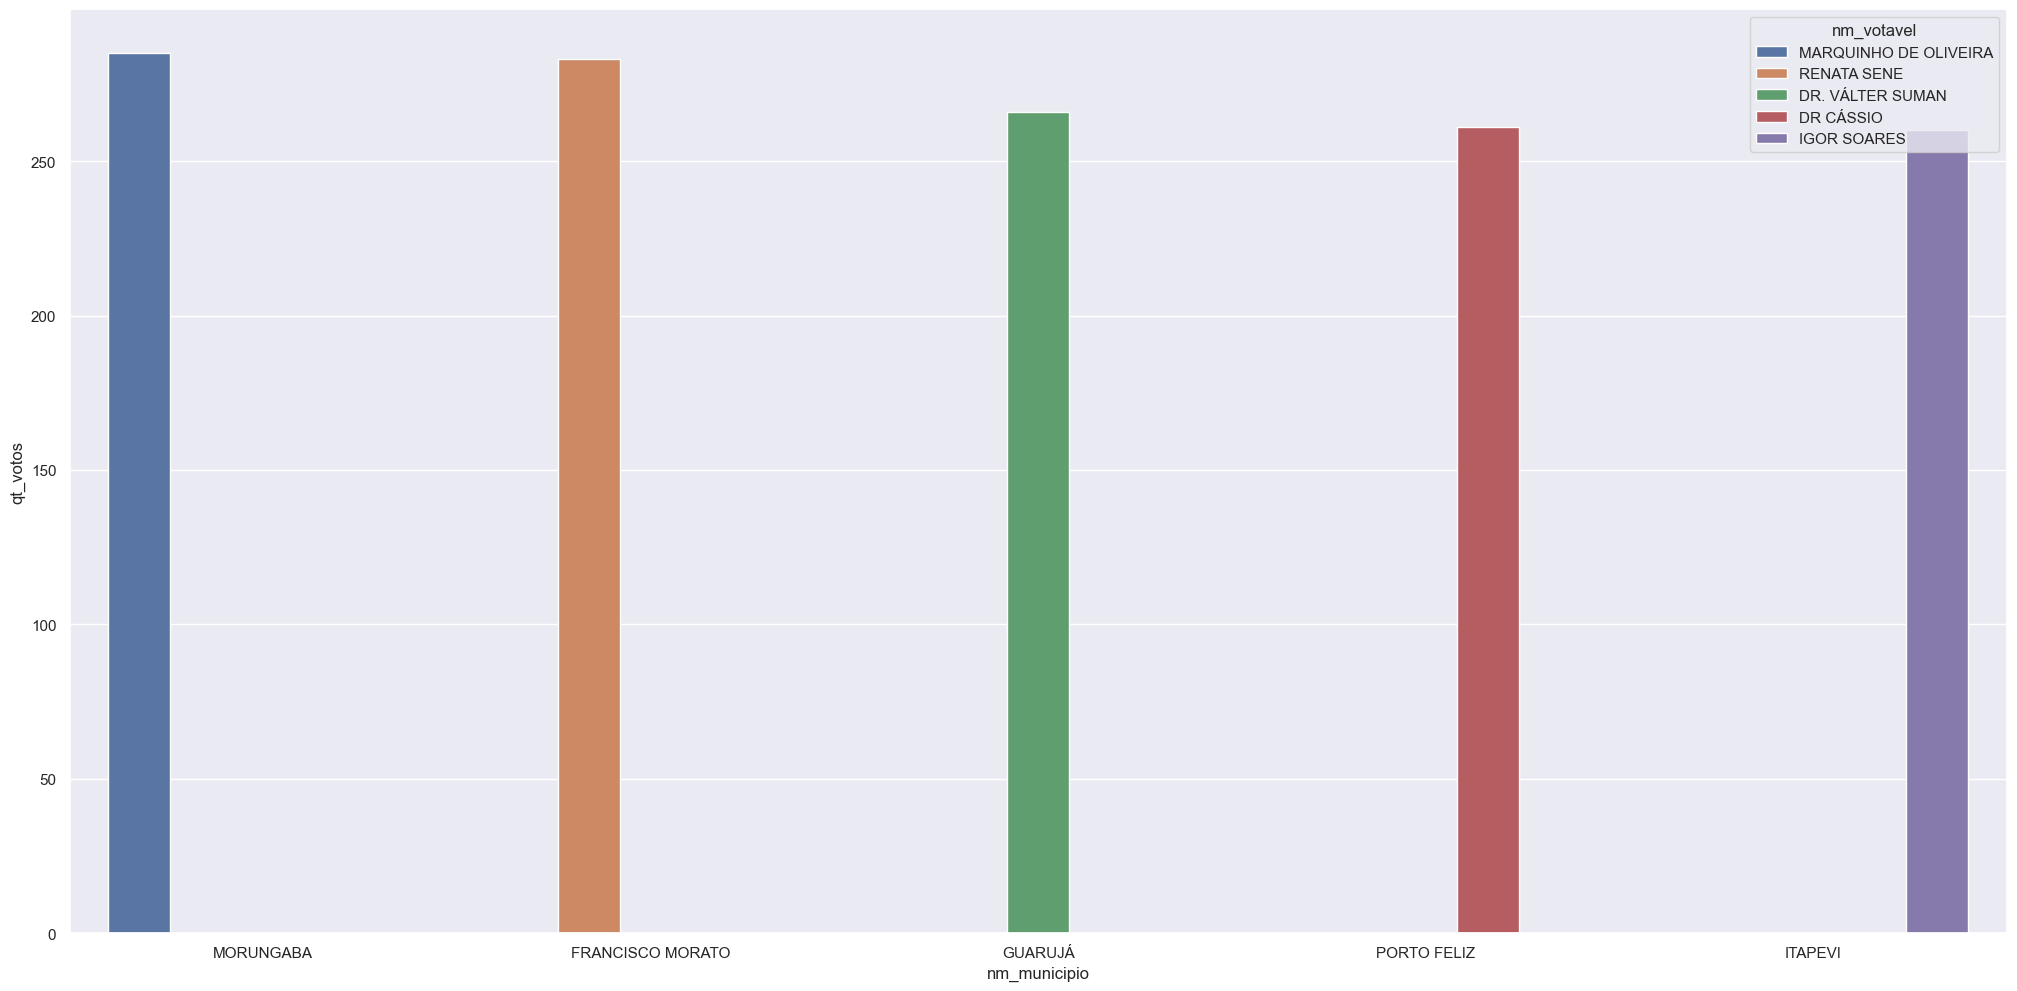

In [50]:
df_graph1 = candidato_mais_votado_por_municipio.head()

sns.barplot(data=df_graph1, x="nm_municipio", y="qt_votos", hue="nm_votavel")

### 2.2.3 Qual gênero mais votou em cada candidato

#### 2.2.3.1 Dataframe

In [53]:
cols2 = ['nm_votavel', 'ds_genero', 'qt_votos']
df_profs = df_merge[cols2].copy()

# Encontrar a linha com o maior número de votos para cada candidato
idx_mais_votou_por_candidato = df_profs.groupby('nm_votavel')['qt_votos'].idxmax()

# Filtrar o DataFrame original usando os índices encontrados
perfil_mais_votou_por_candidato = df_profs.loc[idx_mais_votou_por_candidato]

# Print - Top 5
perfil_mais_votou_por_candidato2 = perfil_mais_votou_por_candidato.sort_values(by='qt_votos', ascending=False).head()
perfil_mais_votou_por_candidato2

,nm_votavel,ds_genero,qt_votos
979889,MARQUINHO DE OLIVEIRA,FEMININO,285.0
2015805,RENATA SENE,FEMININO,283.0
5188836,DR. VÁLTER SUMAN,FEMININO,266.0
848876,DR CÁSSIO,FEMININO,261.0
2259523,IGOR SOARES,MASCULINO,260.0


#### 2.2.3.2 Graphs

<AxesSubplot:xlabel='nm_votavel', ylabel='qt_votos'>

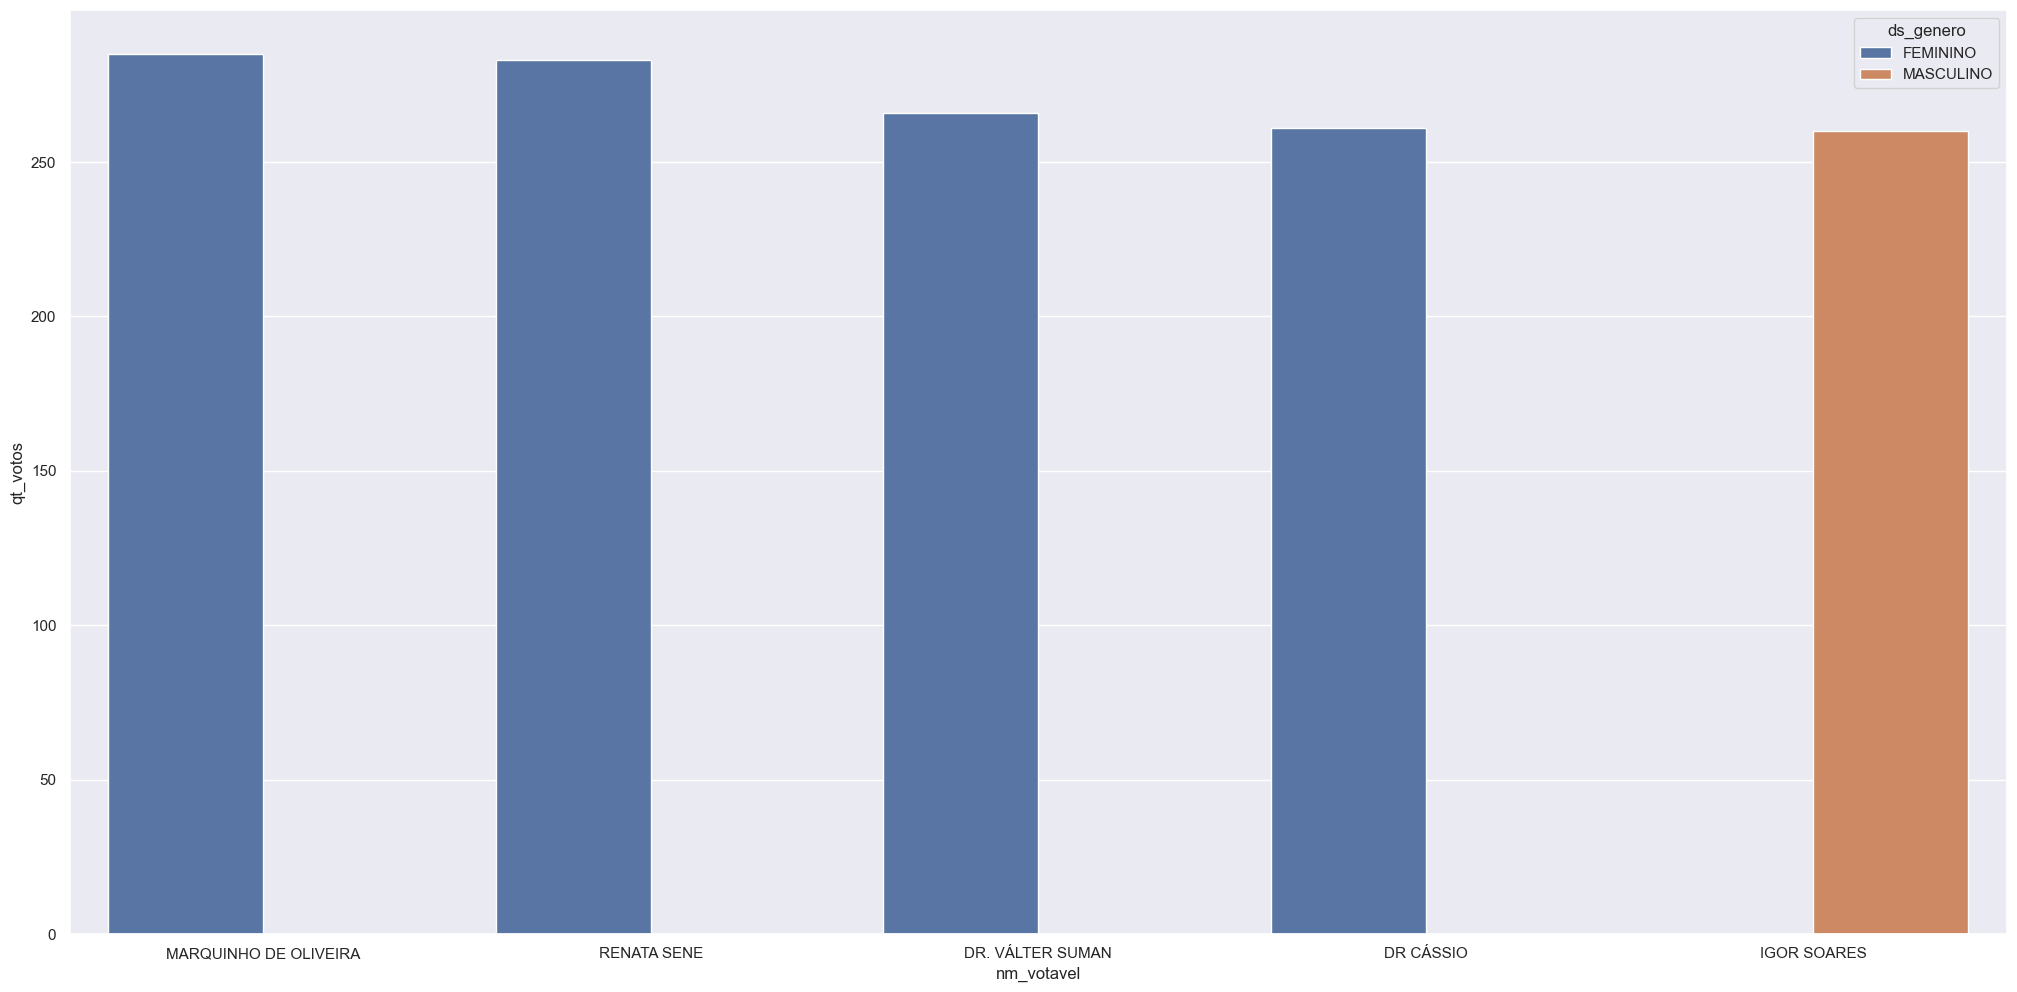

In [55]:
df_graph2 = perfil_mais_votou_por_candidato2

sns.barplot(data=df_graph2, x="nm_votavel", y="qt_votos", hue="ds_genero")

### 2.2.4 Qual faixa etária mais votou em cada candidato

In [45]:
cols3 = ['nm_votavel', 'ds_faixa_etaria', 'qt_votos']
df_profs2 = df_merge[cols3].copy()

# Encontrar a linha com o maior número de votos para cada candidato
idx_mais_votou_por_candidato3 = df_profs2.groupby('nm_votavel')['qt_votos'].idxmax()

# Filtrar o DataFrame original usando os índices encontrados
perfil_mais_votou_por_candidato3 = df_profs2.loc[idx_mais_votou_por_candidato3]

perfil_mais_votou_por_candidato4 = perfil_mais_votou_por_candidato3.sort_values(by='qt_votos', ascending=False).head()
perfil_mais_votou_por_candidato4

,nm_votavel,ds_faixa_etaria,qt_votos
979889,MARQUINHO DE OLIVEIRA,50 a 54 anos,285.0
2015805,RENATA SENE,70 a 74 anos,283.0
5188836,DR. VÁLTER SUMAN,40 a 44 anos,266.0
848876,DR CÁSSIO,45 a 49 anos,261.0
2259523,IGOR SOARES,65 a 69 anos,260.0


<AxesSubplot:xlabel='nm_votavel', ylabel='qt_votos'>

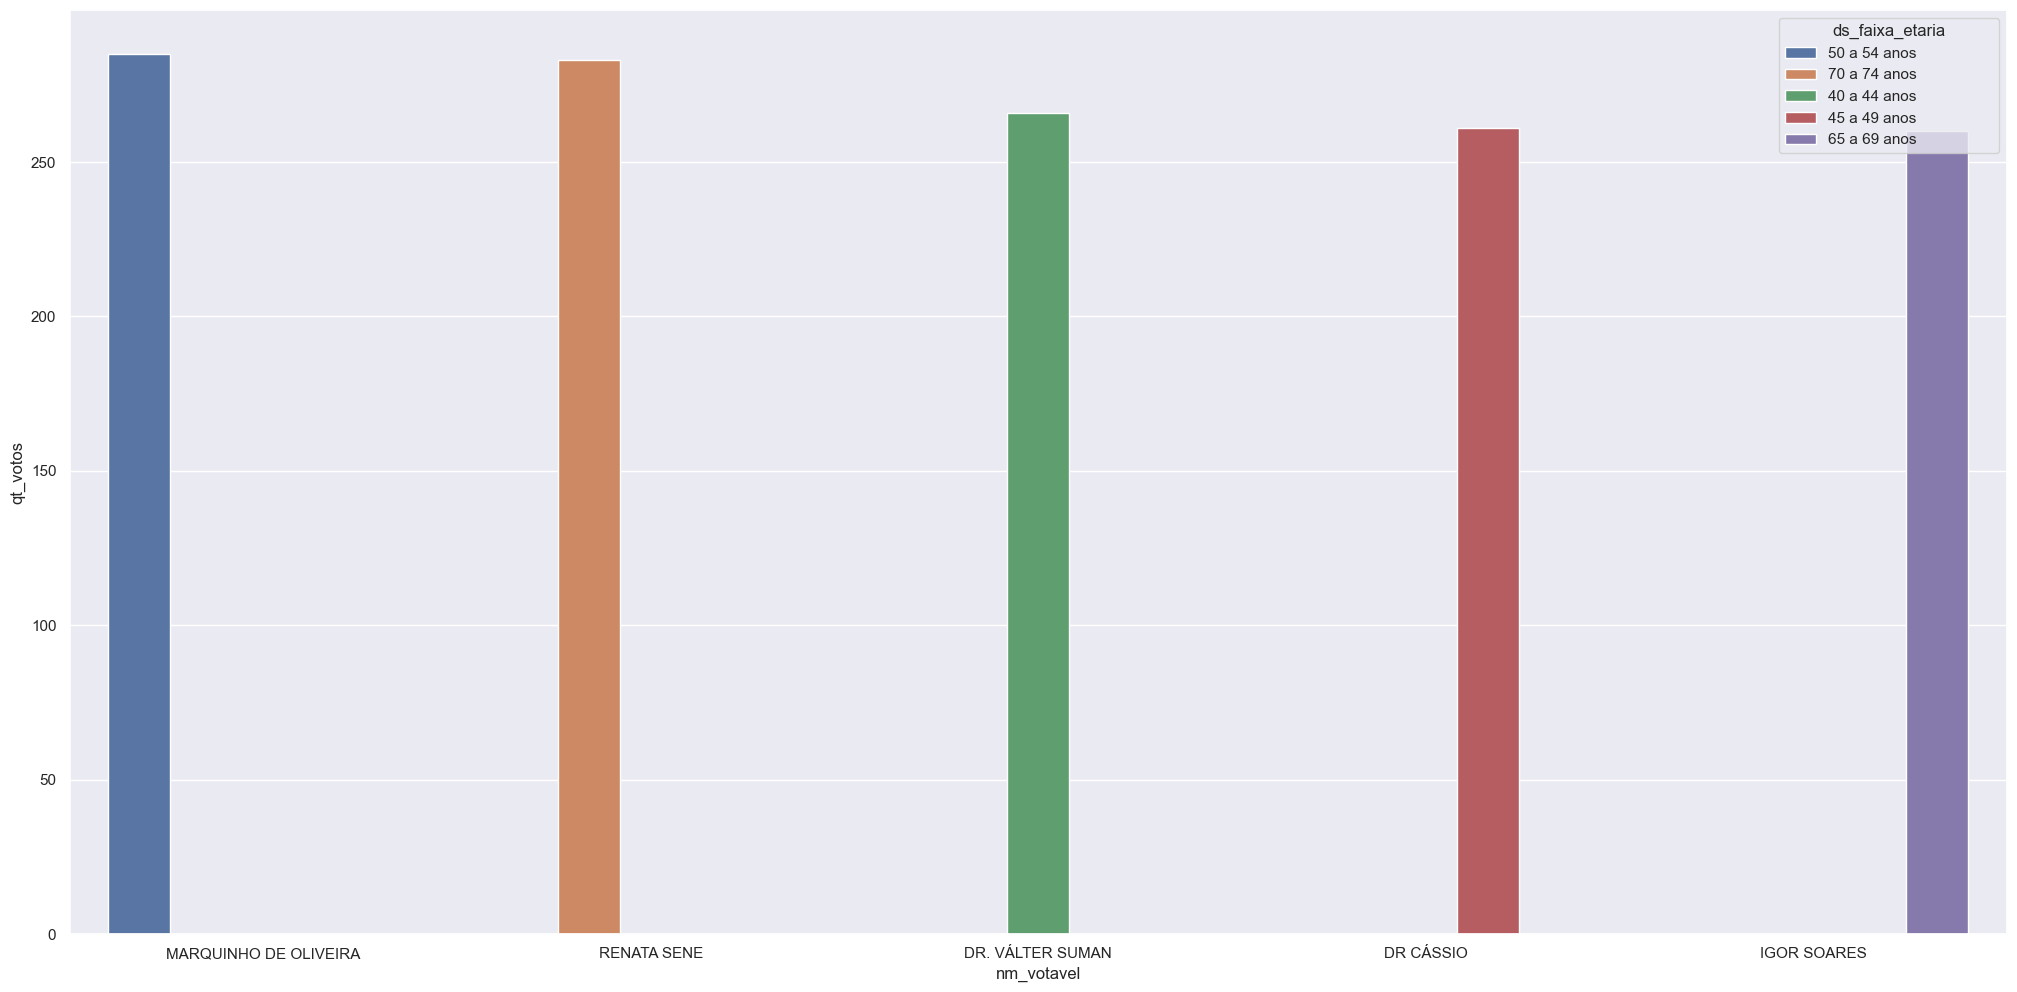

In [46]:
df_graph3 = perfil_mais_votou_por_candidato4

sns.barplot(data=df_graph3, x="nm_votavel", y="qt_votos", hue="ds_faixa_etaria")

### 2.2.5 Qual classe de grau de escolaridade mais votou em cada candidato 

#### 2.2.5.1 Dataframe

In [ ]:
cols4 = ['nm_votavel', 'ds_grau_escolaridade', 'qt_votos']
df_profs3 = df_merge[cols4].copy()

# Encontrar a linha com o maior número de votos para cada candidato
idx_mais_votou_por_candidato5 = df_profs3.groupby('nm_votavel')['qt_votos'].idxmax()

# Filtrar o DataFrame original usando os índices encontrados
perfil_mais_votou_por_candidato5 = df_profs3.loc[idx_mais_votou_por_candidato5]

perfil_mais_votou_por_candidato6 = perfil_mais_votou_por_candidato4.sort_values(by='qt_votos', ascending=False).head()
perfil_mais_votou_por_candidato6

#### 2.2.5.2 Graphs

<AxesSubplot:xlabel='nm_votavel', ylabel='qt_votos'>

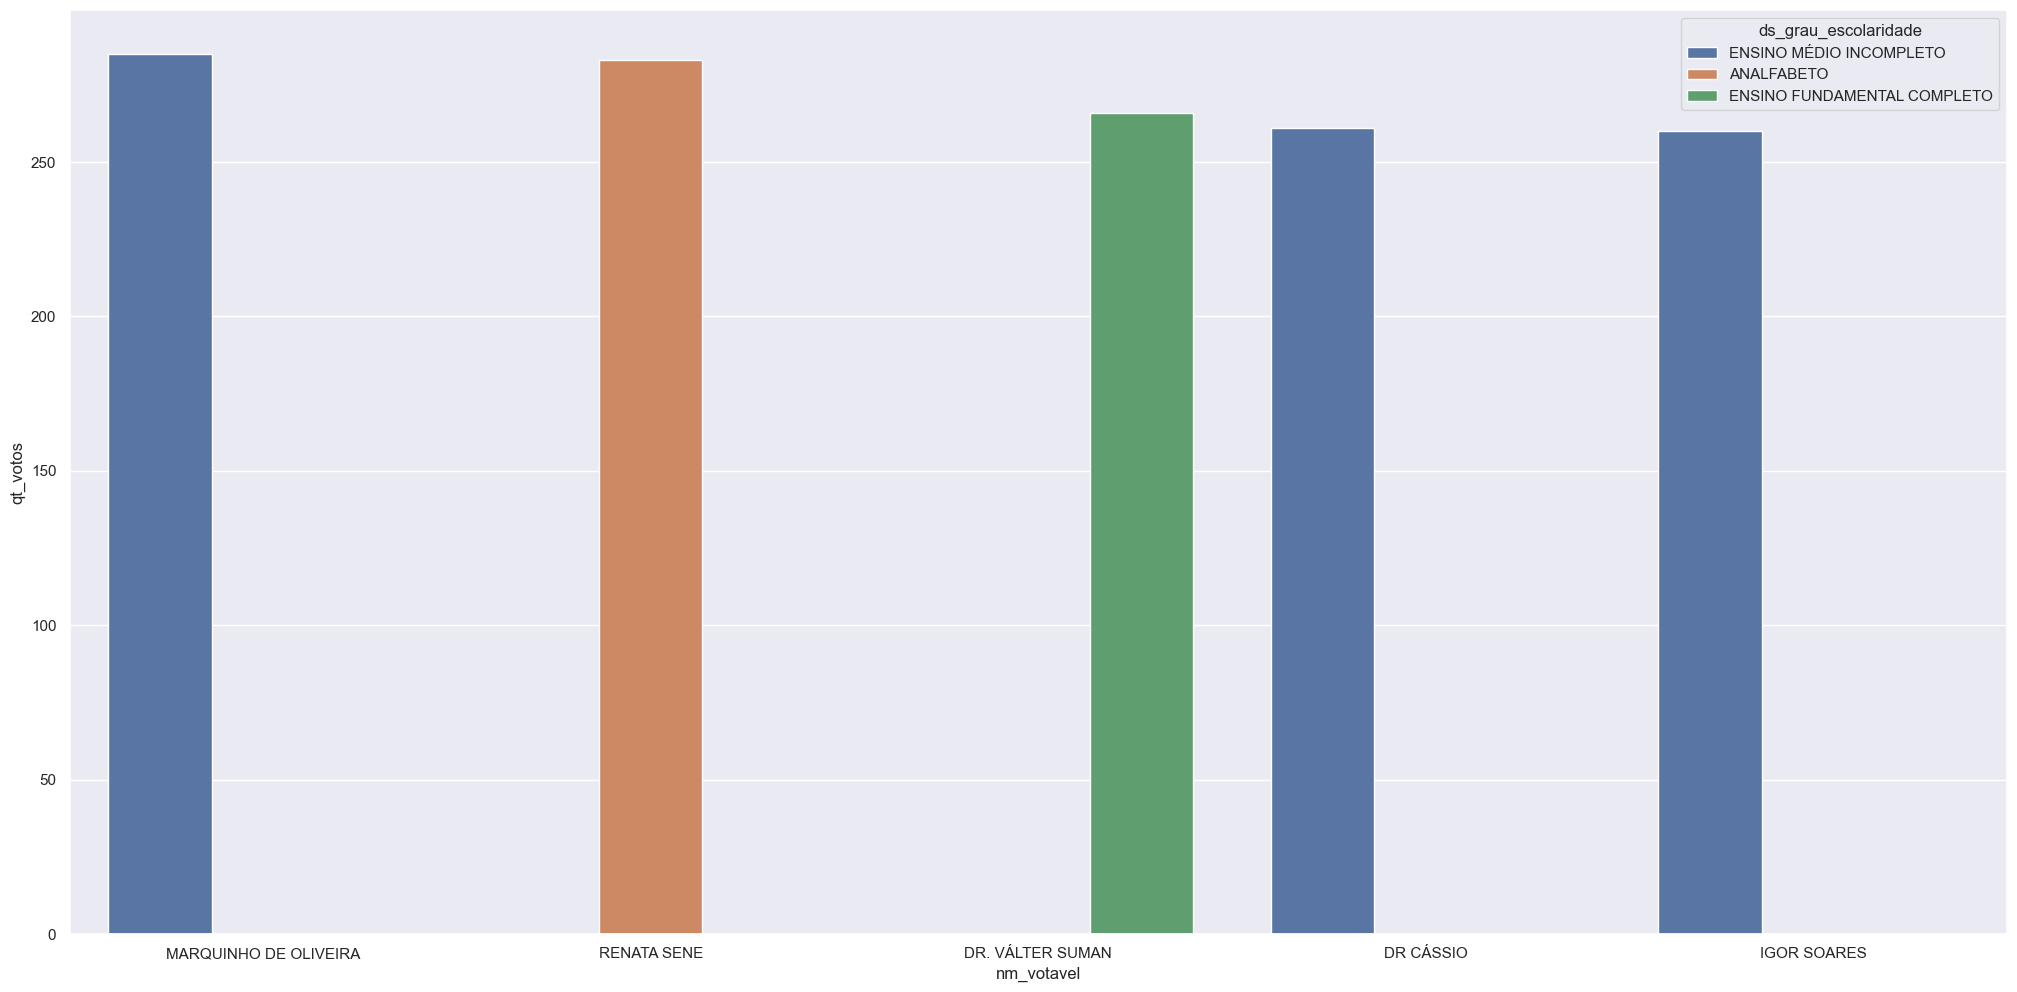

In [63]:
df_graph4 = perfil_mais_votou_por_candidato5

sns.barplot(data=df_graph4, x="nm_votavel", y="qt_votos", hue="ds_grau_escolaridade")

### 2.2.6 Análise de eleitores com deficiência em cada candidato

In [47]:
# Filtrar eleitores com deficiência
eleitores_com_deficiencia = df_merge[df_merge['qt_eleitores_deficiencia'] > 0.0]

# Agrupar os votos por candidato para eleitores com deficiência
votos_por_candidato_com_deficiencia = eleitores_com_deficiencia.groupby('nm_votavel')['qt_votos'].sum()

# Encontrar candidato com mais votos de eleitores com deficiência
candidato_mais_votado_com_deficiencia = votos_por_candidato_com_deficiencia.idxmax()

# Comparar os votos de eleitores com deficiência com o total de votos do candidato
votos_total_candidato = df_merge.groupby('nm_votavel')['qt_votos'].sum()
percentual_votos_com_deficiencia = votos_por_candidato_com_deficiencia[candidato_mais_votado_com_deficiencia] / votos_total_candidato[candidato_mais_votado_com_deficiencia] * 100

print(f"O candidato mais votado por eleitores com deficiência foi o candidato com ID {candidato_mais_votado_com_deficiencia}.")

O candidato mais votado por eleitores com deficiência foi o candidato com ID BRUNO COVAS.


### 2.2.7 Proporção de votos brancos

In [56]:
num = (df_merge['sg_partido'] == '#NULO#').sum()
proporcao = ((num * 100) / (df_merge['sg_partido'].shape[0]))
print("Proporção de votos brancos: {} %".format(proporcao))

Proporção de votos brancos: 3.345248321111926 %


## 2.3 Investigando correlações entre os dados 

### 2.3.1 Correlação entre o grau de escolaridade e votos

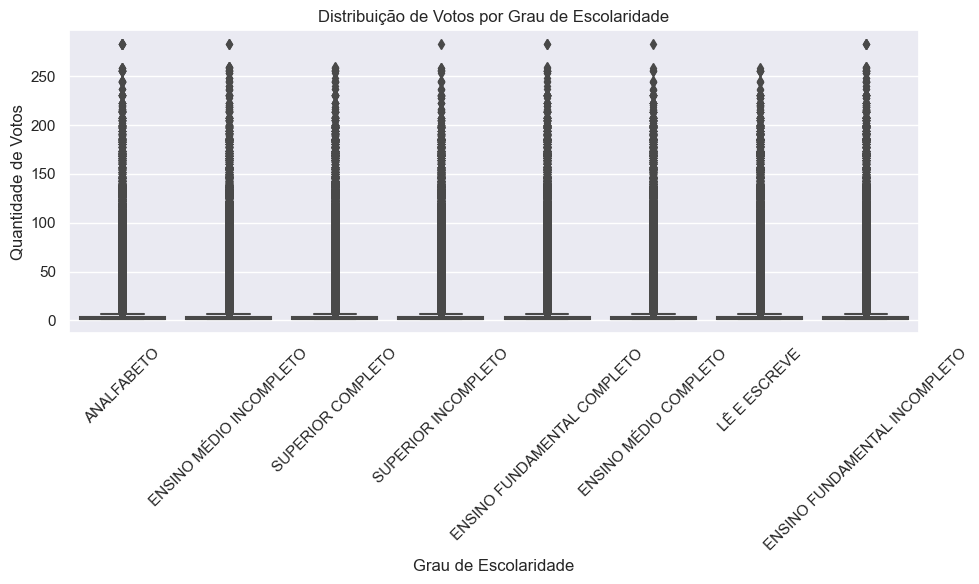

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ds_grau_escolaridade', y='qt_votos', data=df_merge)
plt.xticks(rotation=45)
plt.xlabel('Grau de Escolaridade')
plt.ylabel('Quantidade de Votos')
plt.title('Distribuição de Votos por Grau de Escolaridade')
plt.tight_layout()
plt.show()

### 2.3.2 Relação entre a quantidade de abstenções e a faixa etária dos votantes

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ds_faixa_etaria', y='qt_abstencoes', data=df_merge)
plt.xticks(rotation=45)
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Abstenções')
plt.title('Distribuição de Votos por Grau de Escolaridade')
plt.tight_layout()
plt.show()